In [360]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [407]:
clean_df = pd.read_csv('/data/tide/projects/ho_infxn_ml/clean_data/20240715/both_matched_final_dataset_for_models_20240715.csv')
logit_df = pd.read_csv('/PHShome/zw852/hospital_onset_personal_folder/patient_rematch_results/both_matched_clr_coefficients.csv')
sample_size_df = pd.read_csv('/PHShome/zw852/hospital_onset_personal_folder/patient_rematch_results/both_matched_sample_sizes.csv')

enteric_flora = ['DS_E_coli','ESBL_E_coli', 'DS_K_pneumoniae',
                'ESBL_K_pneumoniae','VSE_faecalis','VRE_faecium', 'C_diff']

skin_flora = ['MSSA','MRSA']

environmental_flora = ['DS_P_aeruginosa', 'DR_P_aeruginosa']


<Figure size 432x288 with 0 Axes>

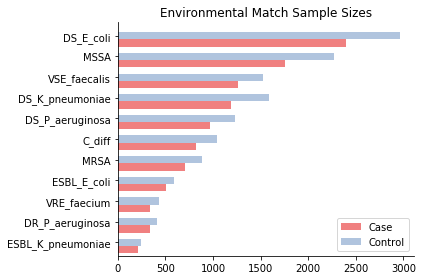

<Figure size 432x288 with 0 Axes>

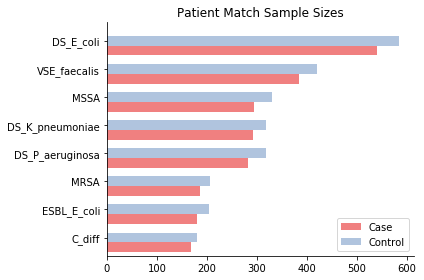

In [408]:
# Create the sample size plot

sample_size_df = sample_size_df.pivot(index=['match','run'],columns='group',values='sample_size').reset_index()
sample_size_df['total'] = sample_size_df['control'] + sample_size_df['case']
env_sample_size = sample_size_df[sample_size_df['match'] == 'environmental'].sort_values(by = ['total'])
env_sample_size = env_sample_size[env_sample_size ['run'].isin(enteric_flora + skin_flora + environmental_flora)]

plt.figure()
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Create the bars

ax.barh(np.arange(len(env_sample_size)), env_sample_size['case'], bar_width, color='lightcoral', label='Case')
ax.barh(np.arange(len(env_sample_size)) + bar_width, env_sample_size['control'], bar_width, color='lightsteelblue', label='Control')

# ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

# Set the y-axis labels
ax.set(yticks= np.arange(len(env_sample_size)) + bar_width, 
       yticklabels=env_sample_size['run'], 
       ylim=[2*bar_width - 1, len(env_sample_size)])

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Environmental Match Sample Sizes")
plt.tight_layout()
plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/env_match_sample_size_plot.png')


## Patient Match Sample Size Plot
patient_sample_size = sample_size_df[sample_size_df['match'] == 'patient'].sort_values(by = ['total'])
patient_sample_size = patient_sample_size[patient_sample_size['total'] >= 300]

plt.figure()
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Create the bars

ax.barh(np.arange(len(patient_sample_size)), patient_sample_size['case'], bar_width, color='lightcoral', label='Case')
ax.barh(np.arange(len(patient_sample_size)) + bar_width, patient_sample_size['control'], bar_width, color='lightsteelblue', label='Control')

# ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

# Set the y-axis labels
ax.set(yticks= np.arange(len(patient_sample_size)) + bar_width, 
       yticklabels=patient_sample_size['run'], 
       ylim=[2*bar_width - 1, len(patient_sample_size)])

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Patient Match Sample Sizes")
plt.tight_layout()
plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/patient_match_sample_size_plot.png')

In [409]:
# Environmental Match Coef Integrated Plot
plt.figure(figsize=(12.8,4.8))
env_match_logit_df = logit_df[logit_df['match'] == 'environmental']
env_match_logit_df = env_match_logit_df[env_match_logit_df['target'].isin(enteric_flora + skin_flora + environmental_flora)]
env_match_logit_df = env_match_logit_df[~env_match_logit_df['variable'].str.startswith('prior_')]
env_match_logit_df[env_match_logit_df['target'] == 'C_diff']

,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag
1,environmental,C_diff,CDiff_cp,1.206755,1.129589,1.289193,0.033716,2.487736e-08,*
2,environmental,C_diff,MSSA_cp,0.972761,0.931325,1.016040,0.022210,2.136867e-01,NaN
3,environmental,C_diff,MRSA_cp,0.930027,0.867497,0.997066,0.035512,4.108081e-02,*
4,environmental,C_diff,DS_Entero_cp,0.984341,0.968153,1.000799,0.008460,6.210998e-02,NaN
5,environmental,C_diff,ESBL_cp,1.043288,1.002709,1.085509,0.020241,3.629308e-02,*
6,environmental,C_diff,VSE_cp,1.026585,0.983712,1.071326,0.021765,2.280194e-01,NaN
7,environmental,C_diff,VRE_cp,1.051463,0.976167,1.132567,0.037911,1.856075e-01,NaN
8,environmental,C_diff,DS_PsA_cp,0.909512,0.852356,0.970500,0.033115,4.180585e-03,*
9,environmental,C_diff,DR_PsA_cp,0.983277,0.902920,1.070785,0.043499,6.982403e-01,NaN


<Figure size 921.6x345.6 with 0 Axes>

In [410]:
# Environmental Match Coef Integrated Plot
env_match_logit_df = logit_df[logit_df['match'] == 'environmental']
env_match_logit_df = env_match_logit_df[env_match_logit_df['target'].isin(enteric_flora + skin_flora + environmental_flora)]
env_match_logit_df = env_match_logit_df[~env_match_logit_df['variable'].str.startswith('prior_')]

env_match_interested_logit_df = pd.DataFrame()
for target in env_match_logit_df['target'].unique():
    sub_df = env_match_logit_df[env_match_logit_df['target'] == target]
    if target in enteric_flora:
        sub_df = sub_df[sub_df['variable'].isin(['DS_Entero_cp','ESBL_cp',
                                                 'VSE_cp', 'VRE_cp', 'CDiff_cp'])]
    elif target in skin_flora:
        sub_df = sub_df[sub_df['variable'].isin(['MSSA_cp','MRSA_cp'])]
    else:
        sub_df = sub_df[sub_df['variable'].isin(['DS_PsA_cp','DR_PsA_cp'])]
    env_match_interested_logit_df = pd.concat([env_match_interested_logit_df, sub_df])
    
env_match_interested_logit_df['target'] = pd.Categorical(env_match_interested_logit_df['target'], ['DS_E_coli','ESBL_E_coli', 'DS_K_pneumoniae',
                'ESBL_K_pneumoniae','VSE_faecalis','VRE_faecium', 'C_diff','MSSA','MRSA','DS_P_aeruginosa', 'DR_P_aeruginosa'])

env_match_interested_logit_df['variable'] = pd.Categorical(env_match_interested_logit_df['variable'], ['DS_Entero_cp','ESBL_cp',
                                                 'VSE_cp', 'VRE_cp', 'CDiff_cp', 'MSSA_cp','MRSA_cp', 'DS_PsA_cp','DR_PsA_cp']) 

env_match_interested_logit_df = env_match_interested_logit_df.sort_values(by = ['target','variable'])
# env_match_interested_logit_df[env_match_interested_logit_df['target'] == 'C_diff']
        

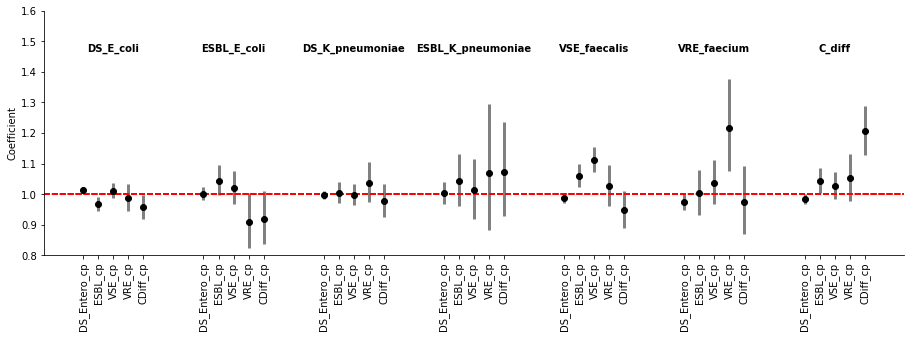

In [411]:
# plot for enteric

plt.figure(figsize=(12.8,4.8))
ax = plt.subplot(1,1,1)

enteric_df = env_match_interested_logit_df[env_match_interested_logit_df['target'].isin(enteric_flora)]
start_point = 1
xtick_loc = []
for target in enteric_df['target'].unique():
    sub_df = enteric_df[enteric_df['target'] == target]
    plt.text(start_point + 0.375, max(enteric_df['upper_CI'] + 0.1) ,target,
             horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.errorbar( np.linspace(start_point, start_point + 0.75, len(sub_df)), 
                     sub_df['coef'], 
                     yerr=[sub_df['coef'] - sub_df['lower_CI'],
                           sub_df['upper_CI'] - sub_df['coef']], 
                     fmt='o', 
                     capsize=0, 
                     color='k', 
                     ecolor='grey',
                     lw=3)
    plt.axhline(y = 1.0, 
                    linestyle = '--',
                    color = 'r')
    xtick_loc += list(np.linspace(start_point, start_point + 0.75, len(sub_df)))
    
    start_point += 1.5

plt.xticks(xtick_loc, enteric_df['variable'], rotation=90)
plt.ylabel('Coefficient')
plt.ylim(0.8, 1.6)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
    
plt.savefig("/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/integrated_environmental_enteric_coef_plot.png")

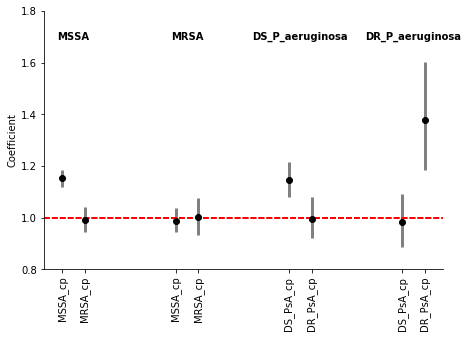

In [412]:
## Plot for Skin and Environmental Flora

plt.figure(figsize=(6.4,4.8))
ax = plt.subplot(1,1,1)

skin_df = env_match_interested_logit_df[env_match_interested_logit_df['target'].isin(skin_flora)]
environmental_df = env_match_interested_logit_df[env_match_interested_logit_df['target'].isin(environmental_flora)]

start_point = 1
xtick_loc = []
for target in skin_df['target'].unique():
    sub_df = skin_df[skin_df['target'] == target]
    plt.text(start_point + 0.05, max(environmental_df['upper_CI'] + 0.1) ,target,
             horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.errorbar( np.linspace(start_point, start_point + 0.1, len(sub_df)), 
                     sub_df['coef'], 
                     yerr=[sub_df['coef'] - sub_df['lower_CI'],
                           sub_df['upper_CI'] - sub_df['coef']], 
                     fmt='o', 
                     capsize=0, 
                     color='k', 
                     ecolor='grey',
                     lw=3)
    plt.axhline(y = 1.0, 
                    linestyle = '--',
                    color = 'r')
    xtick_loc += list(np.linspace(start_point, start_point + 0.1, len(sub_df)))
    
    start_point += 0.5

for target in environmental_df['target'].unique():
    sub_df = environmental_df[environmental_df['target'] == target]
    plt.text(start_point + 0.05, max(environmental_df['upper_CI'] + 0.1) ,target,
             horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.errorbar( np.linspace(start_point, start_point + 0.1, len(sub_df)), 
                     sub_df['coef'], 
                     yerr=[sub_df['coef'] - sub_df['lower_CI'],
                           sub_df['upper_CI'] - sub_df['coef']], 
                     fmt='o', 
                     capsize=0, 
                     color='k', 
                     ecolor='grey',
                     lw=3)
    plt.axhline(y = 1.0, 
                    linestyle = '--',
                    color = 'r')
    xtick_loc += list(np.linspace(start_point, start_point + 0.1, len(sub_df)))
    
    start_point += 0.5

plt.xticks(xtick_loc, list(skin_df['variable']) + list(environmental_df['variable']), rotation=90)
plt.ylabel('Coefficient')
plt.ylim(0.8, 1.8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
    
plt.savefig("/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/integrated_environmental_skin_coef_plot.png")

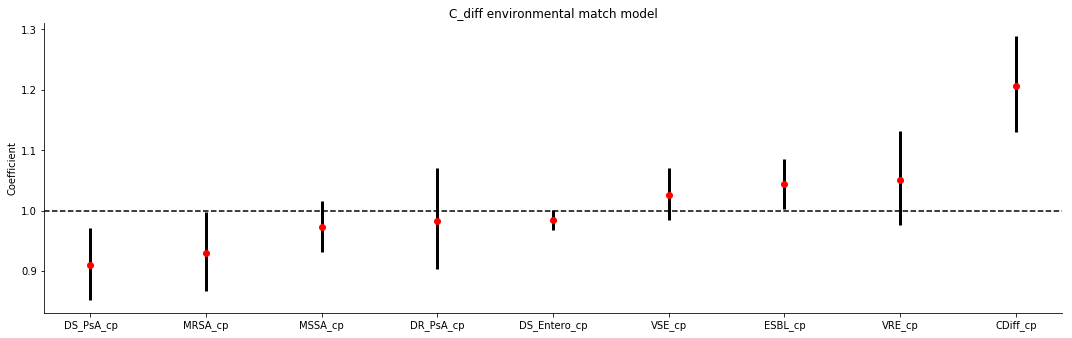

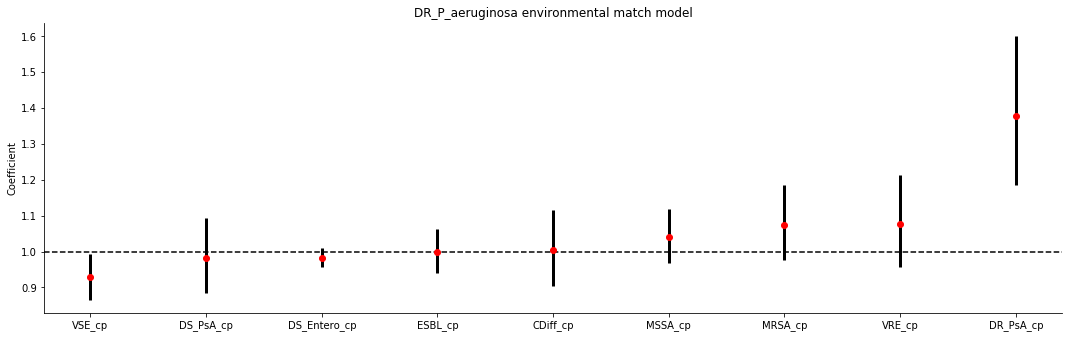

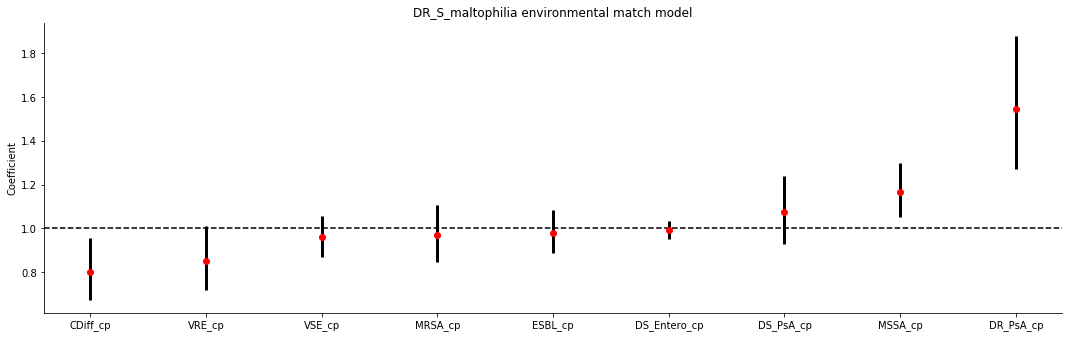

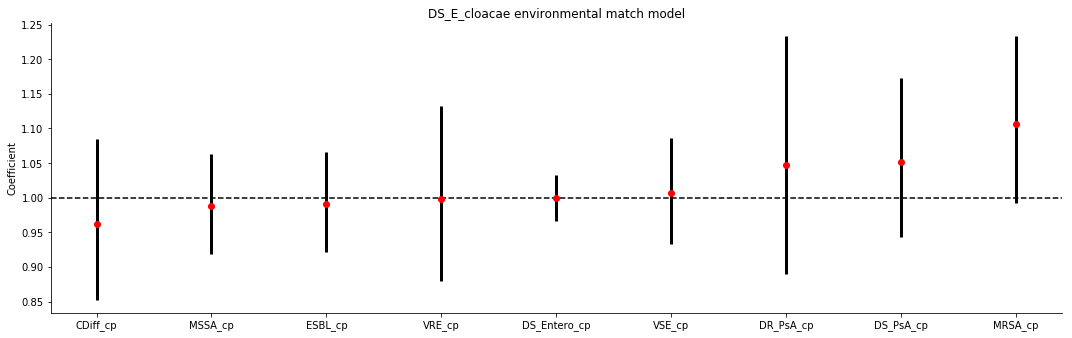

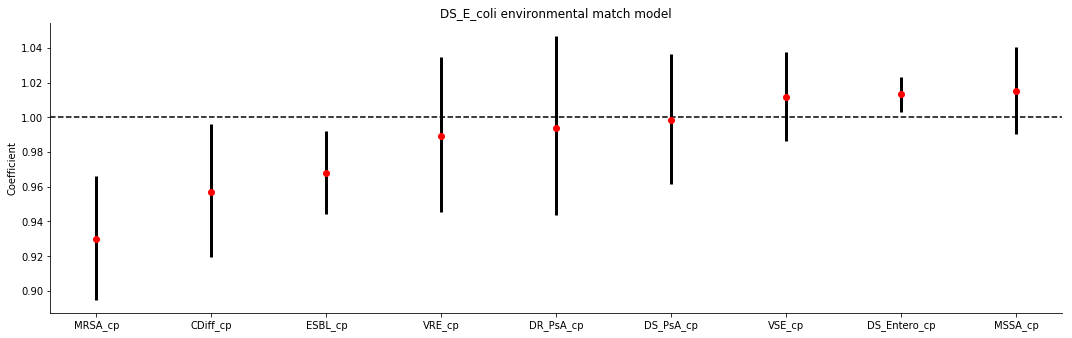

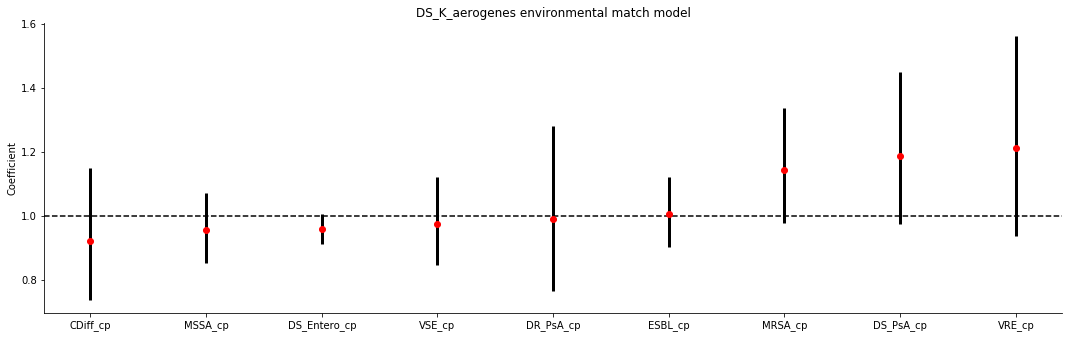

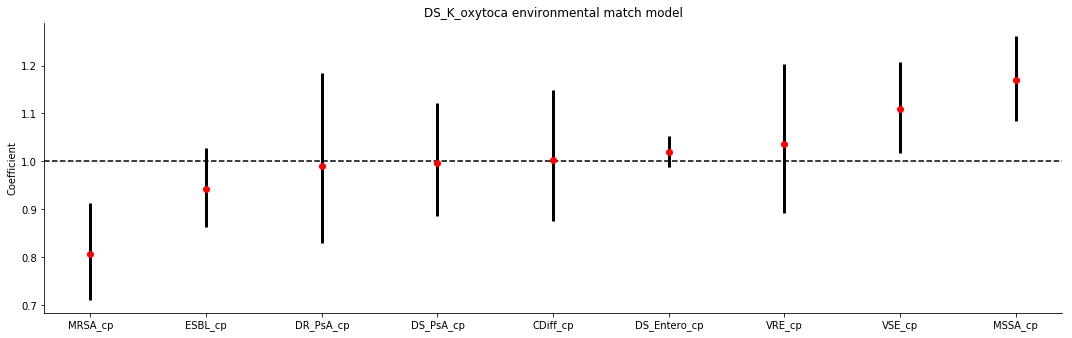

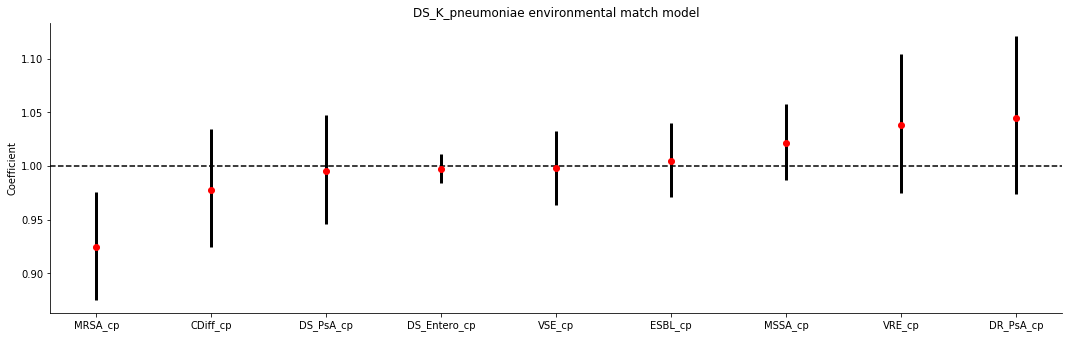

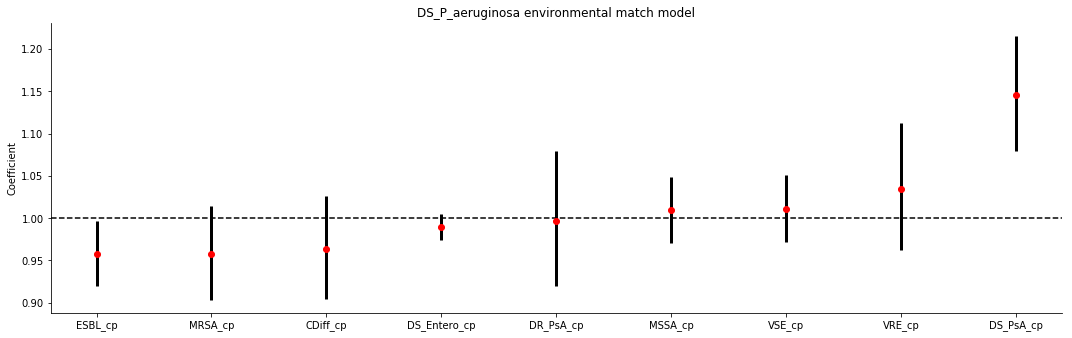

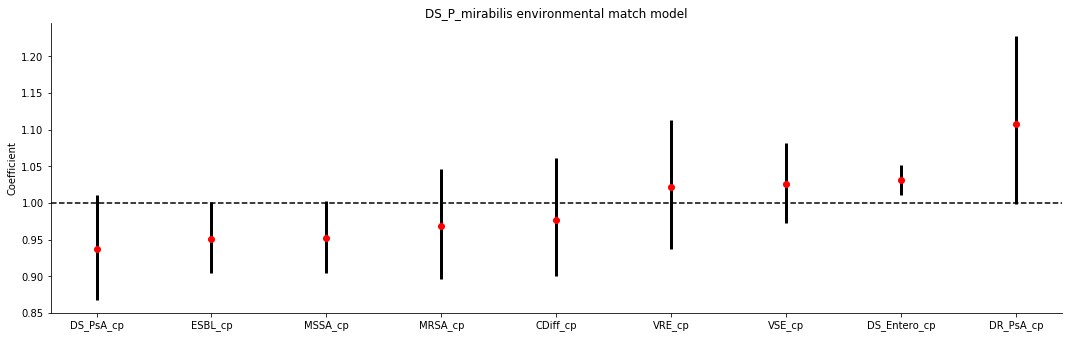

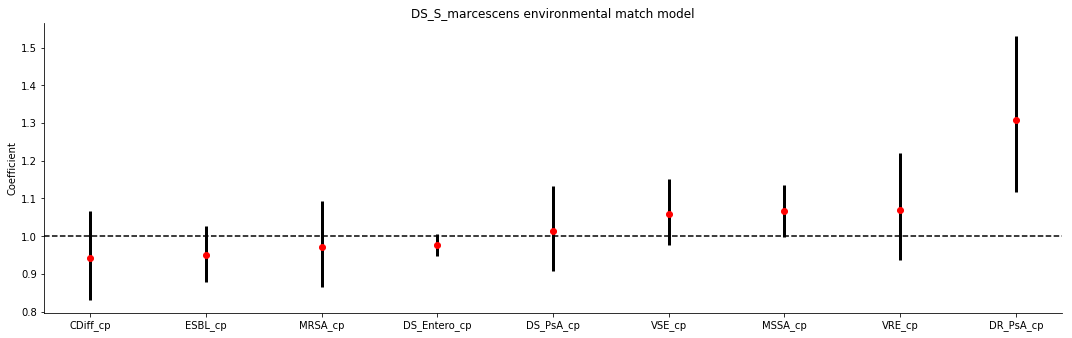

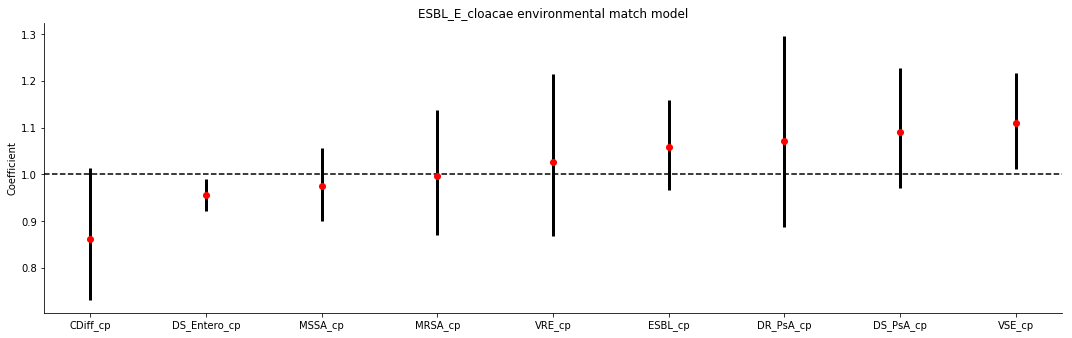

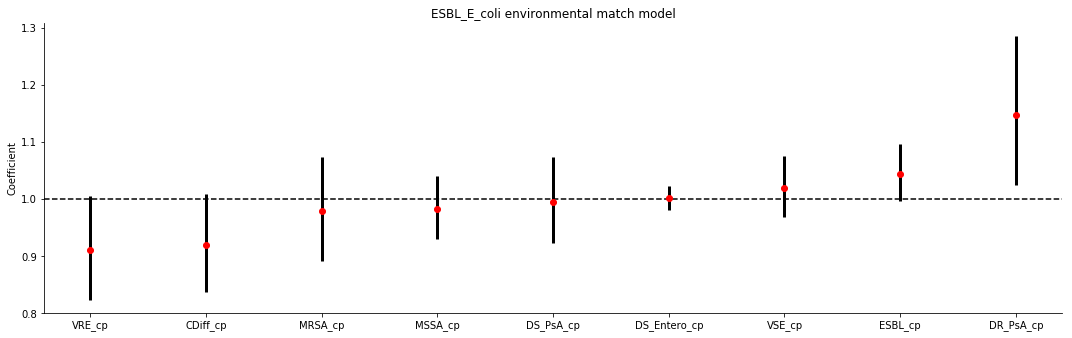

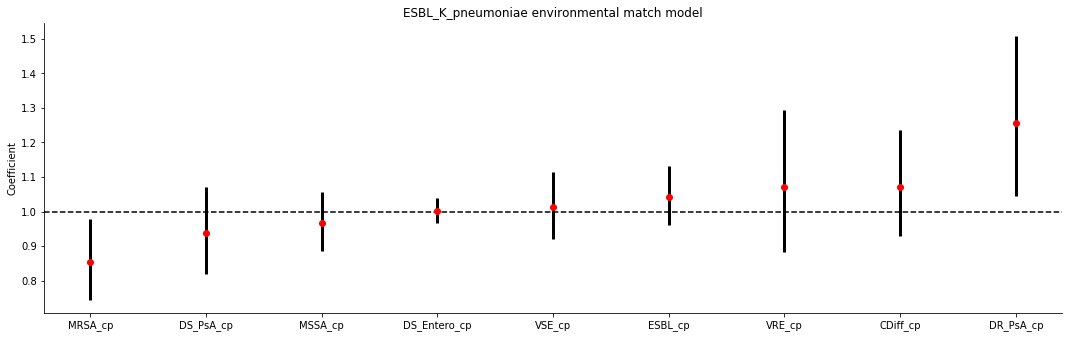

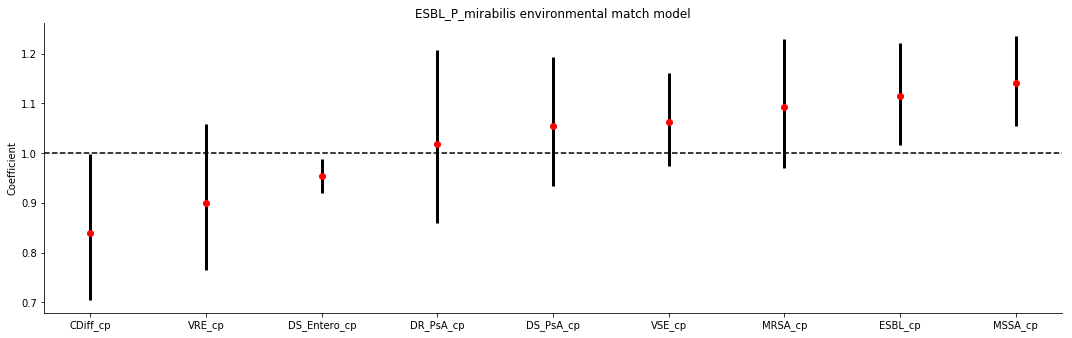

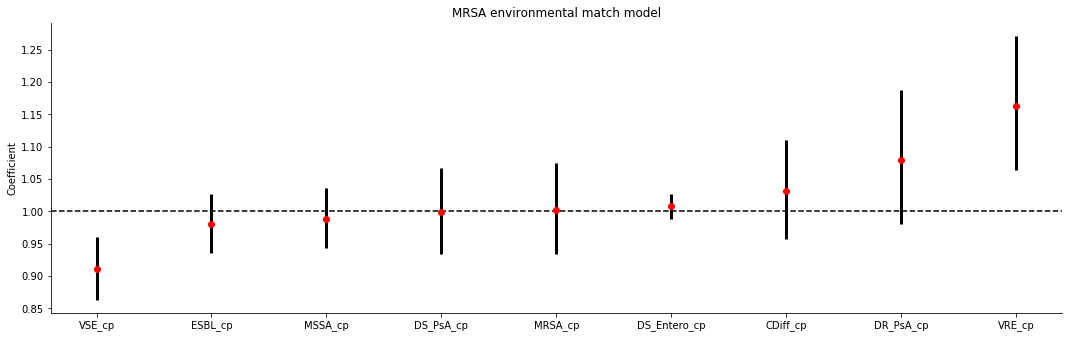

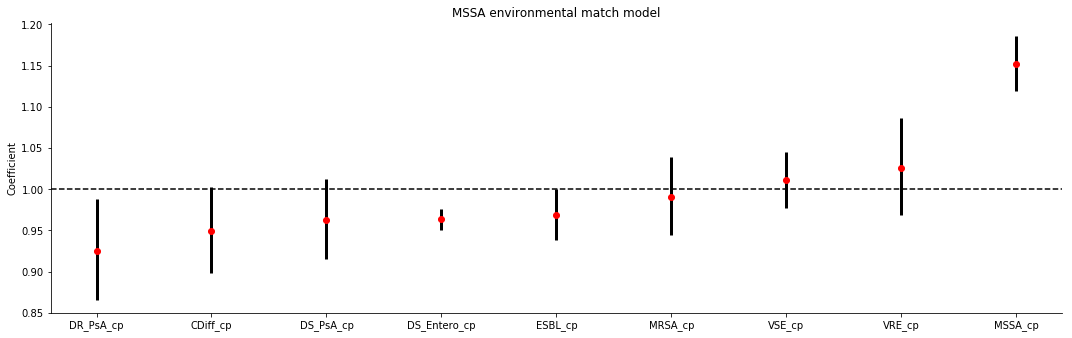

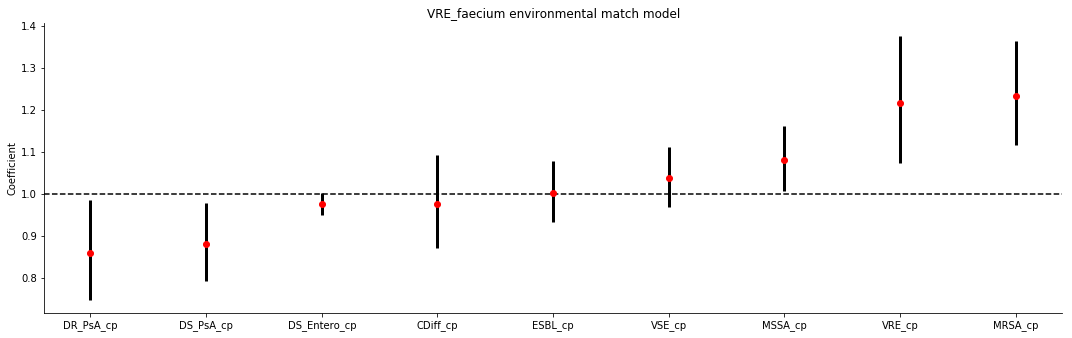

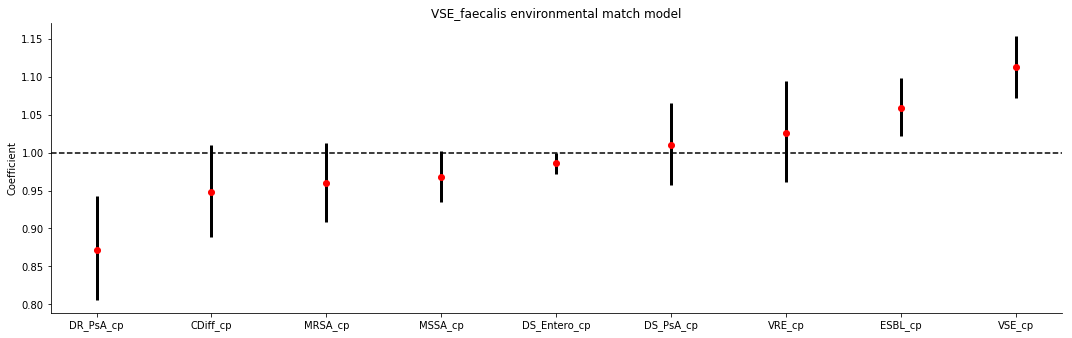

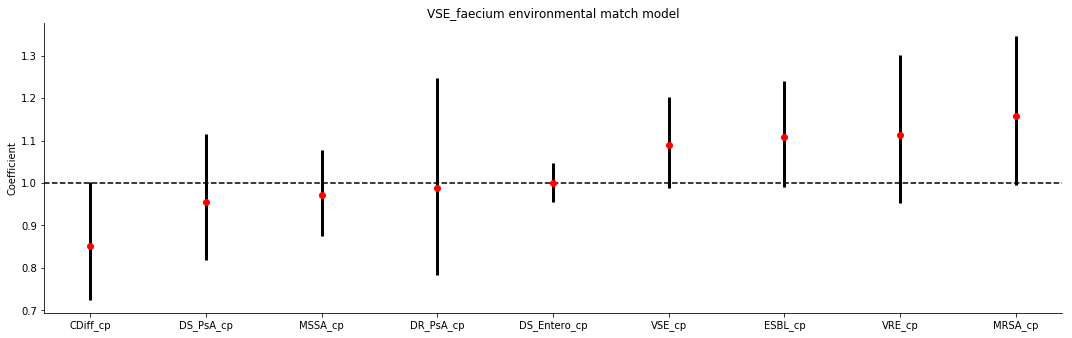

In [345]:
# Environmental Match Coef Plot

env_match_logit_df = logit_df[logit_df['match'] == 'environmental']

for target in env_match_logit_df['target'].unique():
    target_logit_df = env_match_logit_df[env_match_logit_df['target'] == target]
    target_logit_df = target_logit_df[~target_logit_df['variable'].str.startswith('prior')]
    target_logit_df = target_logit_df.sort_values(by = ['coef'], ascending=True)
    
    plt.figure(figsize=(15,4.8))
    ax = plt.subplot(111)
    plt.errorbar(target_logit_df['variable'], 
                 target_logit_df['coef'], 
                 yerr=[target_logit_df['coef'] - target_logit_df['lower_CI'],
                       target_logit_df['upper_CI'] - target_logit_df['coef']], 
                 fmt='o', 
                 capsize=0, 
                 color='r', 
                 ecolor='black',
                 lw=3)
    plt.axhline(y = 1.0, 
                linestyle = '--',
                color = 'k')
    plt.title(f'{target} environmental match model')
    plt.ylabel('Coefficient')
    # plt.text(1,max(target_logit_df['upper_CI']) + 0.05,'*',weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/environmental/{target}.png')
    

In [435]:
print(patient_match_logit_df['variable'].unique())

['anti_anaerobe_0_60' 'anti_Cdiff_0_60' 'anti_staph_beta_lactam_0_60'
 'carbapenem_0_60' 'cephalosporin_0_60'
 'extended_spectrum_cephalosporin_0_60'
 'extended_spectrum_penicillin_0_60' 'fluoroquinolone_0_60'
 'glycopeptide_0_60' 'lincosamide_0_60' 'macrolide_0_60' 'penicillin_0_60'
 'sulfonamide_0_60' 'tetracycline_0_60']


In [465]:
patient_match_logit_df[patient_match_logit_df['variable'] == 'anti_staph_beta_lactam_0_60']

,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag
200,patient,C_diff,anti_staph_beta_lactam_0_60,6.190130e-10,0.000000,inf,40192.970092,0.999579,NaN
286,patient,DS_K_pneumoniae,anti_staph_beta_lactam_0_60,4.063039e-08,0.000000,inf,4961.059767,0.997263,NaN
301,patient,DS_P_aeruginosa,anti_staph_beta_lactam_0_60,6.375415e-01,0.262762,1.546874,0.452239,0.319566,NaN
350,patient,ESBL_E_coli,anti_staph_beta_lactam_0_60,3.163523e+04,0.000000,inf,12189.134041,0.999322,NaN


In [463]:
# Patient Match Coefficient Integrated Plot
patient_match_logit_df = logit_df[logit_df['match'] == 'patient']
patient_match_logit_df = patient_match_logit_df[patient_match_logit_df['target'].isin(enteric_flora + skin_flora + environmental_flora)]
patient_match_logit_df = patient_match_logit_df[~patient_match_logit_df['variable'].str.startswith('prior_')]

patient_match_logit_df

patient_match_interested_logit_df = pd.DataFrame()
for target in patient_match_logit_df['target'].unique():
    sub_df = patient_match_logit_df[patient_match_logit_df['target'] == target]
    if target in ['DS_E_coli','DS_K_pneumoniae']:
        sub_df = sub_df[sub_df['variable'].isin(['penicillin_0_60', 'extended_spectrum_penicillin_0_60', 'cephalosporin_0_60', 
                                                 'extended_spectrum_cephalosporin_0_60','carbapenem_0_60','fluoroquinolone_0_60',
                                                 'tetracycline_0_60','anti_anaerobe_0_60','anti_Cdiff_0_60'])]
    elif target == 'ESBL_K_pneumoniae':
        sub_df = sub_df[sub_df['variable'].isin(['cephalosporin_0_60', 'extended_spectrum_cephalosporin_0_60',
                                                 'carbapenem_0_60','fluoroquinolone_0_60',
                                                 'tetracycline_0_60','anti_anaerobe_0_60','anti_Cdiff_0_60'])]
    elif target == 'VSE_faecalis':
        sub_df = sub_df[sub_df['variable'].isin(['penicillin_0_60', 'cephalosporin_0_60', 'extended_spectrum_cephalosporin_0_60',
                                                 'fluoroquinolone_0_60','anti_anaerobe_0_60','anti_Cdiff_0_60','glycopeptide_0_60' ])]
    elif target == 'VRE_faecium':
        sub_df = sub_df[sub_df['variable'].isin(['cephalosporin_0_60', 'extended_spectrum_cephalosporin_0_60',
                                                 'fluoroquinolone_0_60','anti_anaerobe_0_60','anti_Cdiff_0_60','glycopeptide_0_60'])]
    elif target == 'C_diff':
        sub_df = sub_df[sub_df['variable'].isin(['fluoroquinolone_0_60','anti_Cdiff_0_60','glycopeptide_0_60'])]
    elif target in ['MSSA','MRSA']:
        sub_df = sub_df[sub_df['variable'].isin(['anti_staph_beta_lactam_0_60','cephalosporin_0_60',
                                                 'fluoroquinolone_0_60', 'macrolide_0_60', 'tetracycline_0_60', 'sulfonamide_0_60', 
                                                 'anti_Cdiff_0_60','glycopeptide_0_60'])]
    elif target in ['DS_P_aeruginosa','DR_P_aeruginosa']:
        sub_df = sub_df[sub_df['variable'].isin(['extended_spectrum_cephalosporin_0_60', 'carbapenem_0_60',
                                                 'fluoroquinolone_0_60'])]
    else:
        continue
    
    patient_match_interested_logit_df = pd.concat([patient_match_interested_logit_df, sub_df])
    
patient_match_interested_logit_df['target'] = pd.Categorical(patient_match_interested_logit_df['target'], ['DS_E_coli', 'DS_K_pneumoniae',
                'ESBL_K_pneumoniae','VSE_faecalis','VRE_faecium', 'C_diff','MSSA','MRSA','DS_P_aeruginosa', 'DR_P_aeruginosa'])

patient_match_interested_logit_df['variable'] = pd.Categorical(patient_match_interested_logit_df['variable'], ['penicillin_0_60','extended_spectrum_penicillin_0_60', 'anti_staph_beta_lactam_0_60','cephalosporin_0_60', 
                                                                                                       'extended_spectrum_cephalosporin_0_60',
                                                                                                       'carbapenem_0_60',
                                                                                                       'fluoroquinolone_0_60','macrolide_0_60', 'tetracycline_0_60', 
                                                                                                       'sulfonamide_0_60','anti_anaerobe_0_60','anti_Cdiff_0_60','glycopeptide_0_60']) 

patient_match_interested_logit_df = patient_match_interested_logit_df.sort_values(by = ['target','variable'])
# patient_match_interested_logit_df = patient_match_interested_logit_df[np.isfinite(patient_match_interested_logit_df['upper_CI'])]
patient_match_interested_logit_df[patient_match_interested_logit_df['target'] == 'MSSA']

,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag
392,patient,MSSA,cephalosporin_0_60,1.861749,0.952173,3.640209,0.342111,0.069262,NaN
395,patient,MSSA,fluoroquinolone_0_60,0.820610,0.491931,1.368893,0.261081,0.448892,NaN
398,patient,MSSA,macrolide_0_60,0.895934,0.574629,1.396897,0.226607,0.627726,NaN
401,patient,MSSA,tetracycline_0_60,0.626708,0.230110,1.706851,0.511196,0.360673,NaN
400,patient,MSSA,sulfonamide_0_60,0.198696,0.056279,0.701504,0.643609,0.012046,*
396,patient,MSSA,glycopeptide_0_60,2.246590,0.444496,11.354816,0.826662,0.327514,NaN


In [448]:
patient_match_interested_logit_df

,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag
262,patient,DS_E_coli,penicillin_0_60,0.225262,0.032925,1.541151,0.981150,0.128731,NaN
257,patient,DS_E_coli,extended_spectrum_penicillin_0_60,1.212069,0.854940,1.718378,0.178091,0.280167,NaN
255,patient,DS_E_coli,cephalosporin_0_60,0.504897,0.337595,0.755109,0.205365,0.000876,*
256,patient,DS_E_coli,extended_spectrum_cephalosporin_0_60,0.602773,0.355946,1.020761,0.268761,0.059632,NaN
254,patient,DS_E_coli,carbapenem_0_60,1.043507,0.627035,1.736597,0.259872,0.869827,NaN
258,patient,DS_E_coli,fluoroquinolone_0_60,0.824540,0.628540,1.081660,0.138486,0.163577,NaN
264,patient,DS_E_coli,tetracycline_0_60,0.996812,0.693927,1.431898,0.184796,0.986212,NaN
252,patient,DS_E_coli,anti_anaerobe_0_60,1.122459,0.225017,5.599182,0.819964,0.887960,NaN
253,patient,DS_E_coli,anti_Cdiff_0_60,0.607982,0.268659,1.375881,0.416693,0.232405,NaN
295,patient,DS_K_pneumoniae,penicillin_0_60,1.958467,0.713353,5.376851,0.515285,0.192081,NaN


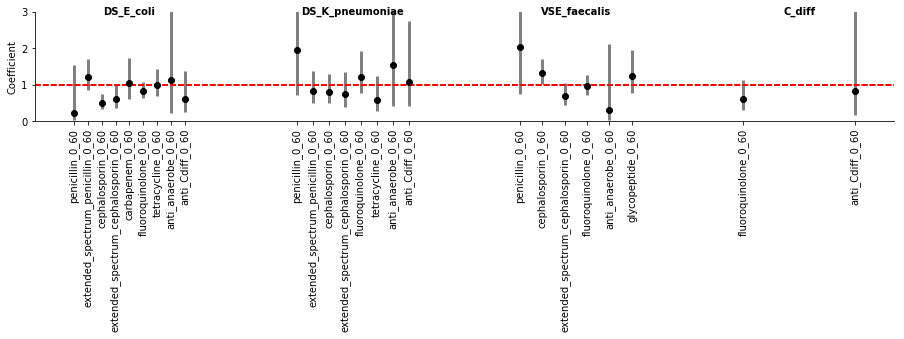

In [452]:
# Enteric Plot

plt.figure(figsize=(12.8,4.8))
ax = plt.subplot(1,1,1)

enteric_flora = ['DS_E_coli','ESBL_E_coli', 'DS_K_pneumoniae',
                'ESBL_K_pneumoniae','VSE_faecalis','VRE_faecium', 'C_diff']
enteric_flora.remove('ESBL_K_pneumoniae')
enteric_flora.remove('VRE_faecium')

enteric_df = patient_match_interested_logit_df[patient_match_interested_logit_df['target'].isin(enteric_flora)]
start_point = 1
xtick_loc = []
for target in enteric_df['target'].unique():
    sub_df = enteric_df[enteric_df['target'] == target]
    plt.text(start_point + 0.375, 3 ,target,
             horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.errorbar( np.linspace(start_point, start_point + 0.75, len(sub_df)), 
                     sub_df['coef'], 
                     yerr=[sub_df['coef'] - sub_df['lower_CI'],
                           sub_df['upper_CI'] - sub_df['coef']], 
                     fmt='o', 
                     capsize=0, 
                     color='k', 
                     ecolor='grey',
                     lw=3)
    plt.axhline(y = 1.0, 
                    linestyle = '--',
                    color = 'r')
    xtick_loc += list(np.linspace(start_point, start_point + 0.75, len(sub_df)))
    
    start_point += 1.5

plt.xticks(xtick_loc, enteric_df['variable'], rotation=90)
plt.ylabel('Coefficient')
plt.ylim(0, 3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
    
plt.savefig("/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/integrated_patient_enteric_coef_plot.png")

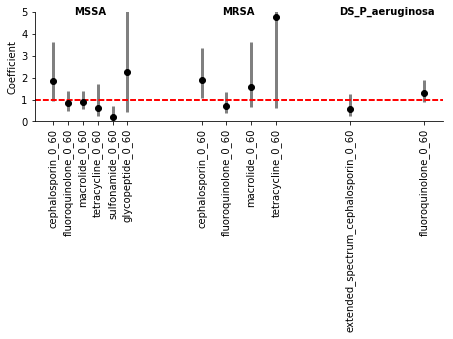

In [458]:
# Skin Flora Plot

plt.figure(figsize=(6.4,4.8))
ax = plt.subplot(1,1,1)

environmental_flora = ['DS_P_aeruginosa', 'DR_P_aeruginosa']
environmental_flora.remove('DR_P_aeruginosa')

skin_env_df = patient_match_interested_logit_df[patient_match_interested_logit_df['target'].isin(skin_flora + environmental_flora)]
start_point = 1
xtick_loc = []
for target in skin_env_df['target'].unique():
    sub_df = skin_env_df[skin_env_df['target'] == target]
#     plt.text(start_point + 0.375, max(patient_match_interested_logit_df['upper_CI'].replace([np.inf, -np.inf], np.nan).dropna()) + 0.3 ,target,
#              horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.text(start_point + 0.375, 5 ,target,
             horizontalalignment='center', verticalalignment='center', weight="bold")
    plt.errorbar( np.linspace(start_point, start_point + 0.75, len(sub_df)), 
                     sub_df['coef'], 
                     yerr=[sub_df['coef'] - sub_df['lower_CI'],
                           sub_df['upper_CI'] - sub_df['coef']], 
                     fmt='o', 
                     capsize=0, 
                     color='k', 
                     ecolor='grey',
                     lw=3)
    plt.axhline(y = 1.0, 
                    linestyle = '--',
                    color = 'r')
    xtick_loc += list(np.linspace(start_point, start_point + 0.75, len(sub_df)))
    
    start_point += 1.5

plt.xticks(xtick_loc, skin_env_df['variable'], rotation=90)
plt.ylabel('Coefficient')
plt.ylim(0, 5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
    
plt.savefig("/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/integrated_patient_skin_env_coef_plot.png")

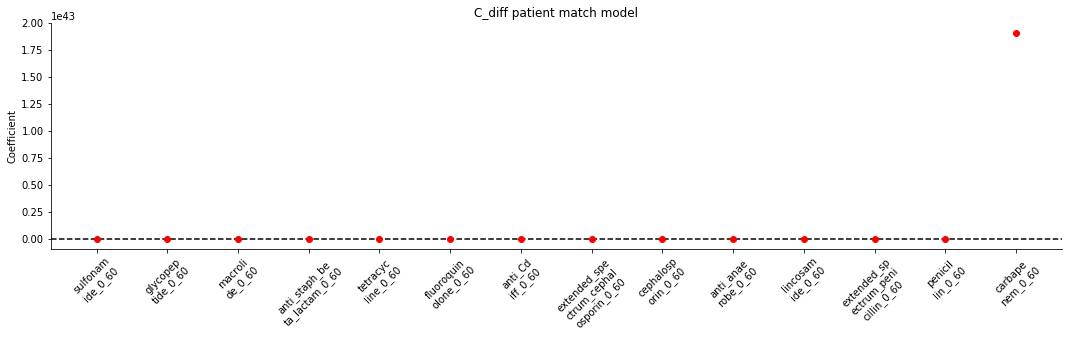

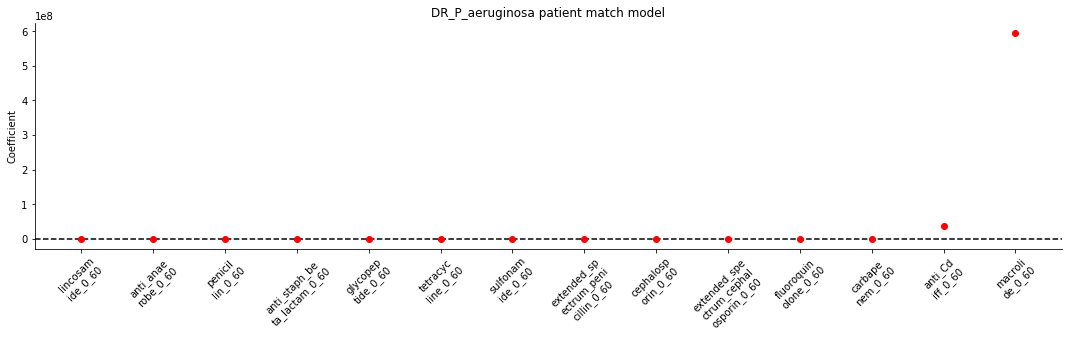

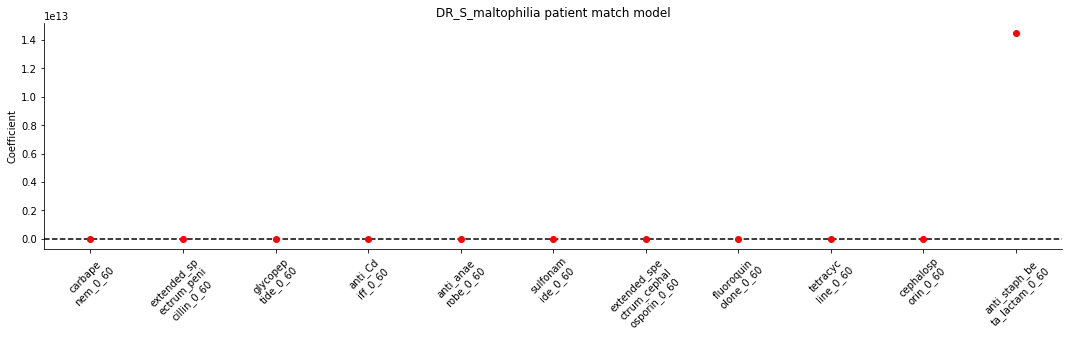

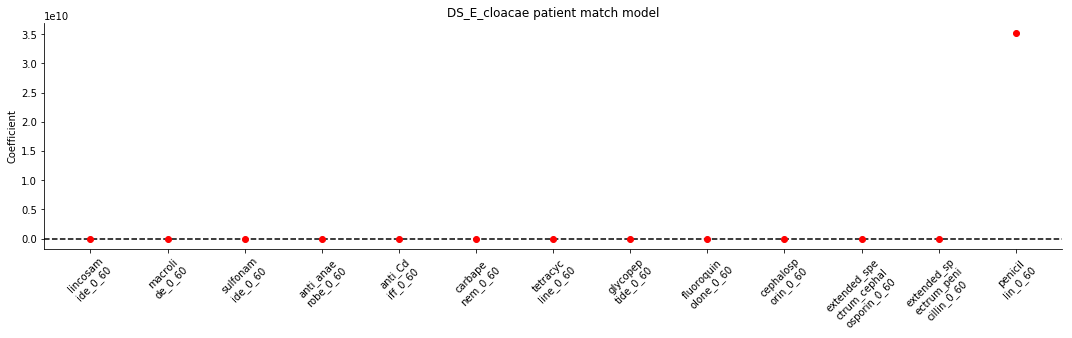

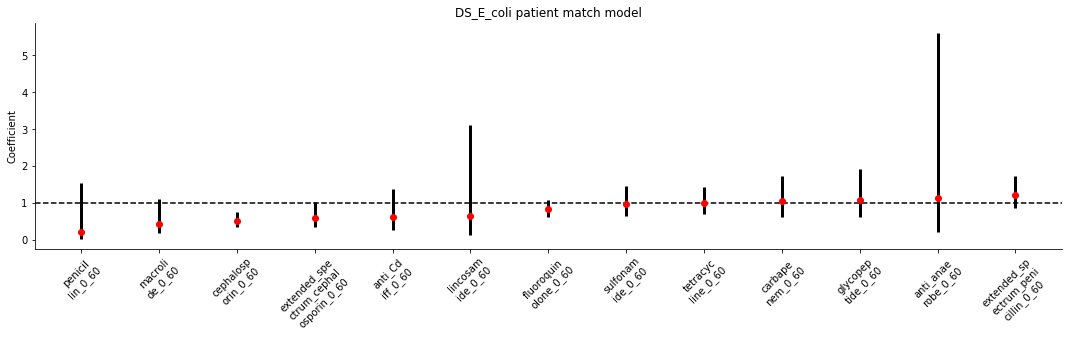

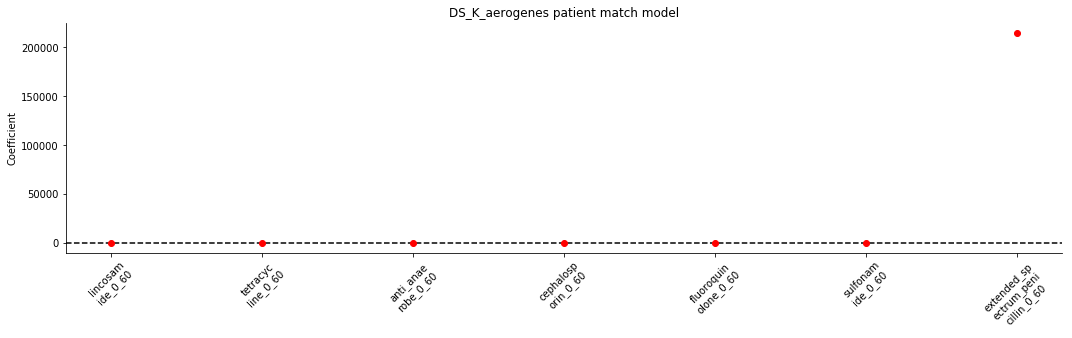

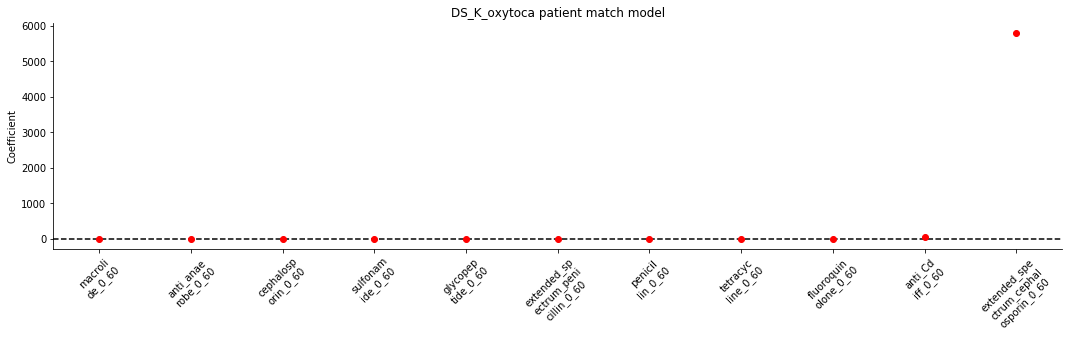

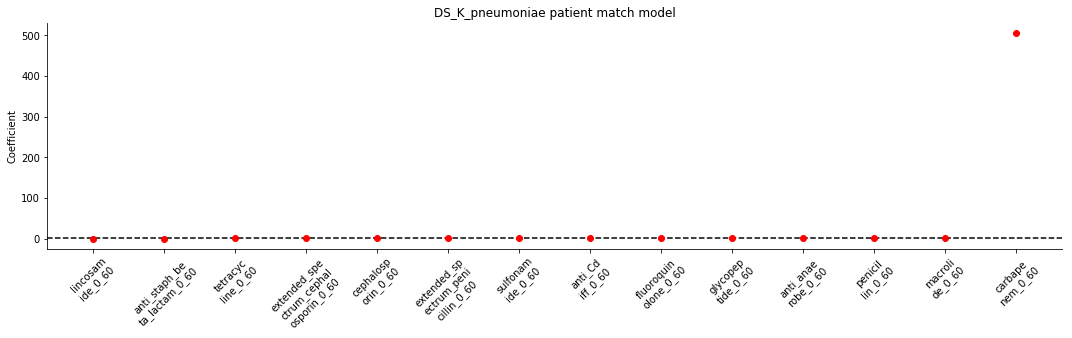

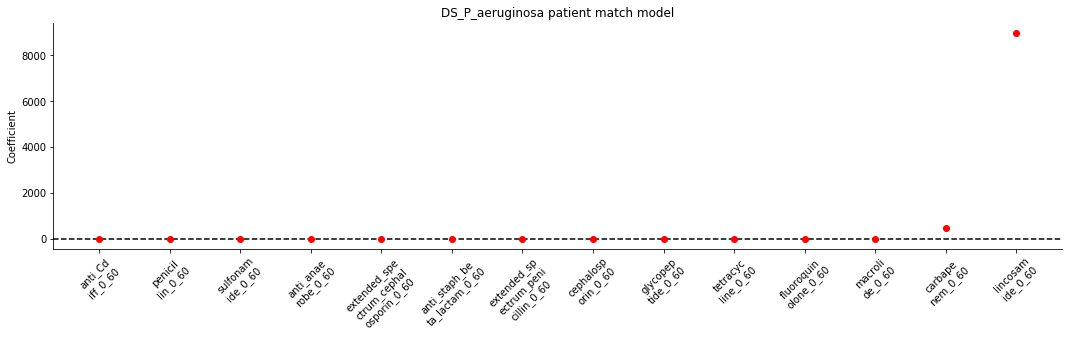

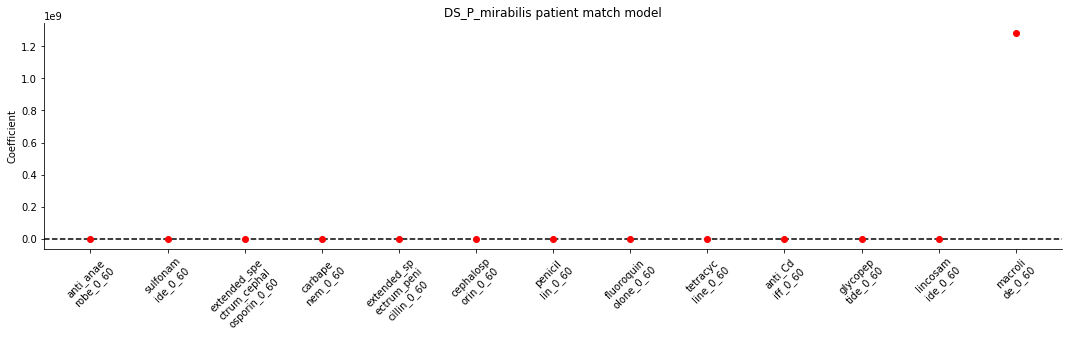

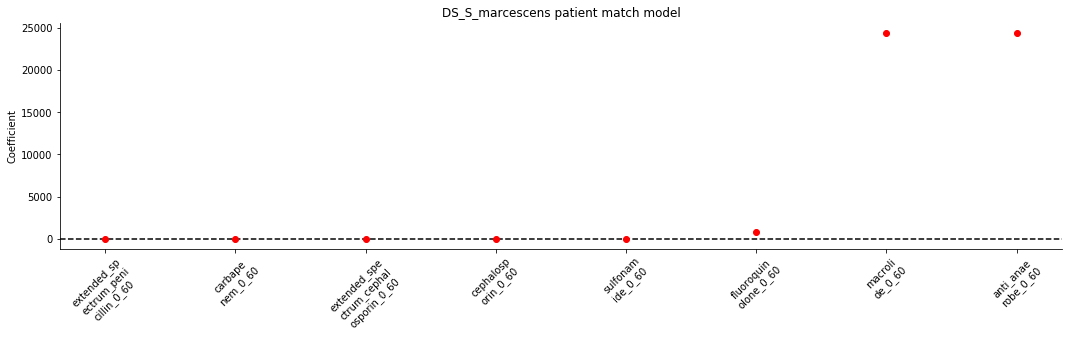

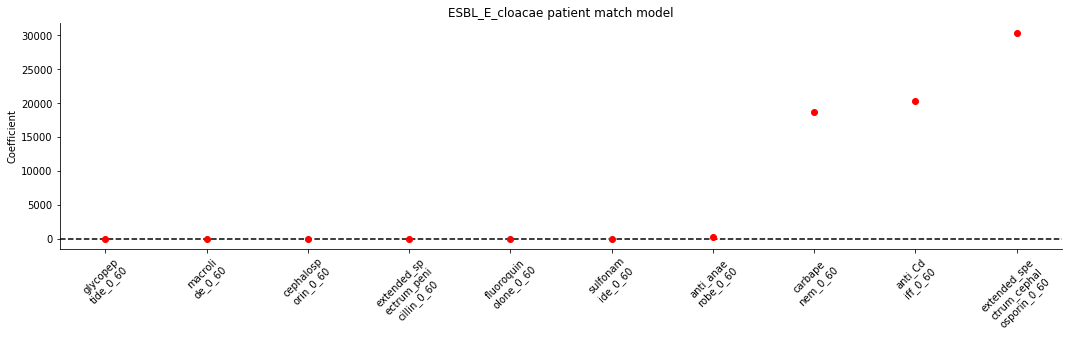

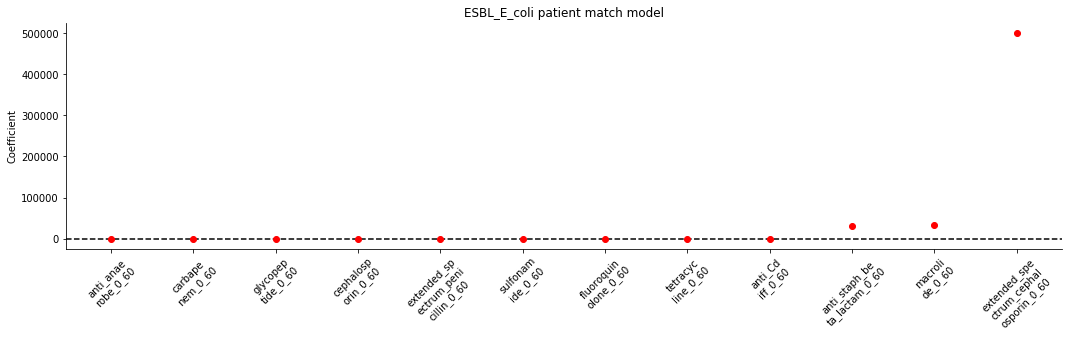

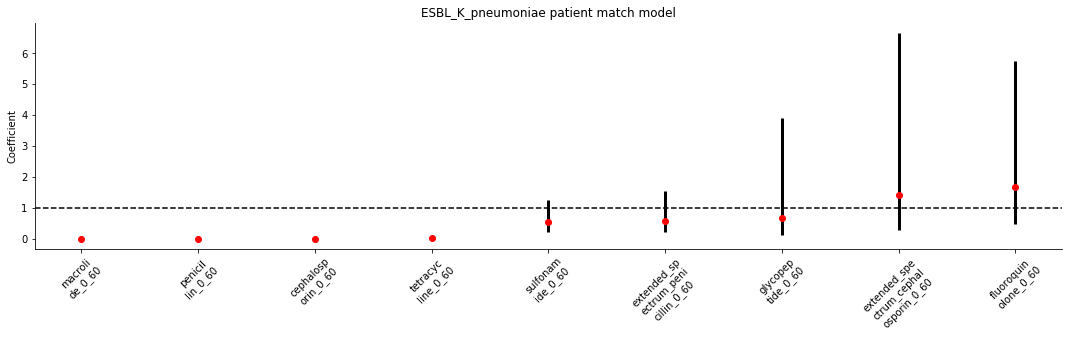

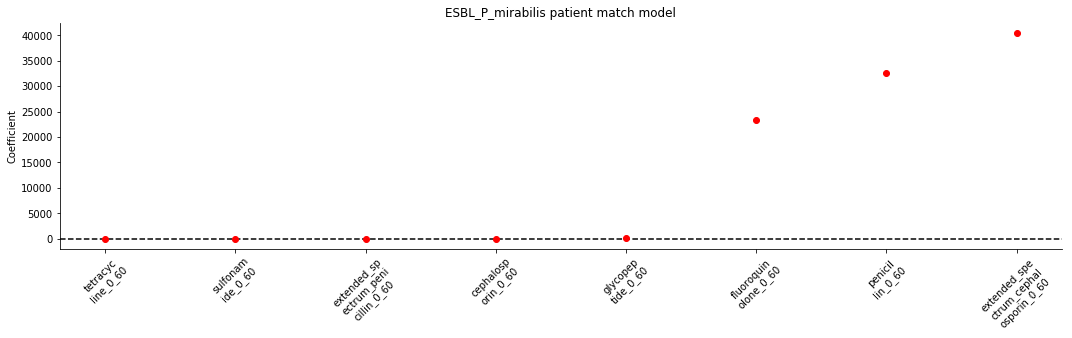

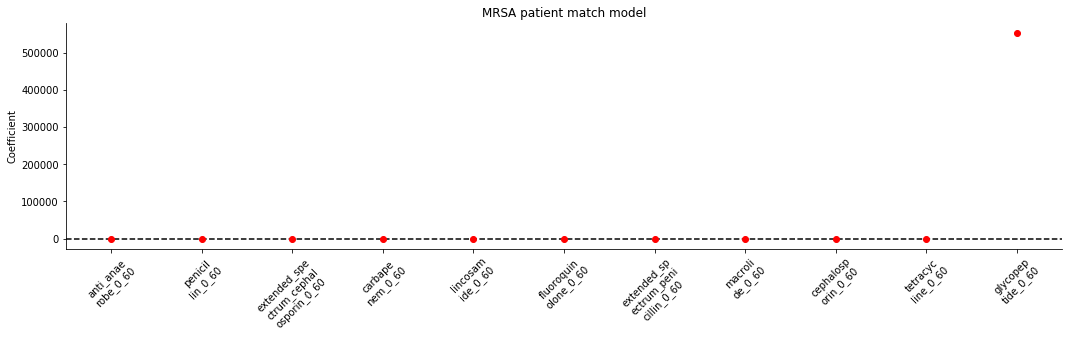

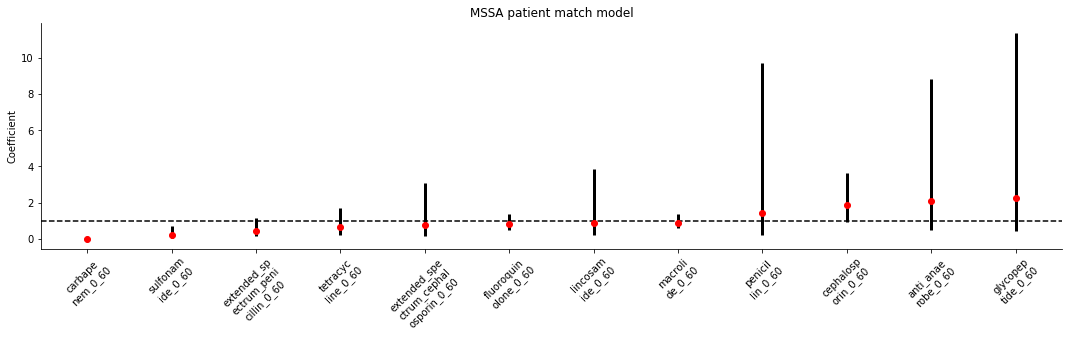

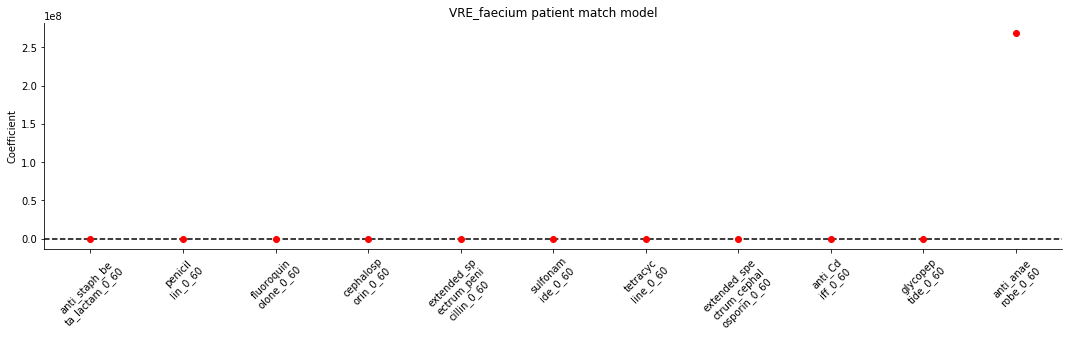

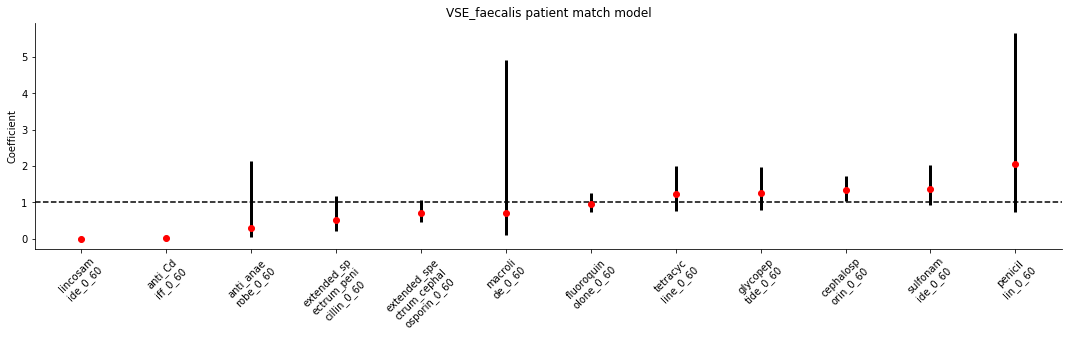

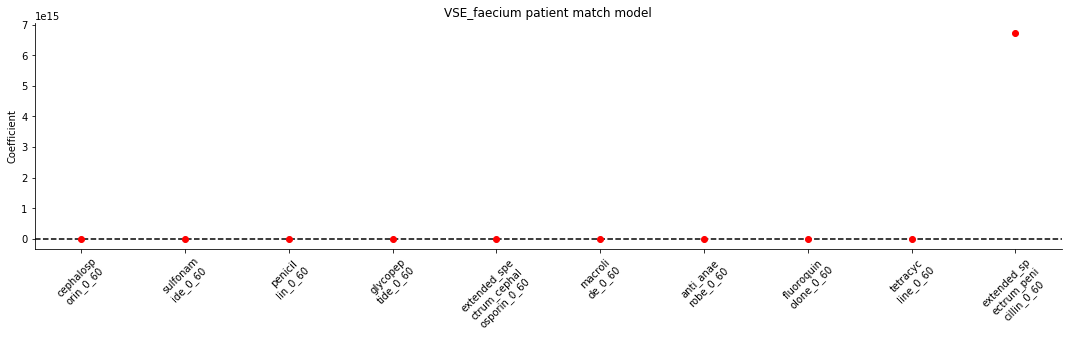

In [351]:
# Patient Match Coef Plot

patient_match_logit_df = logit_df[logit_df['match'] == 'patient']

for target in patient_match_logit_df['target'].unique():
    target_logit_df = patient_match_logit_df[patient_match_logit_df['target'] == target]
    target_logit_df = target_logit_df[target_logit_df['variable'].str.endswith('_0_60')]
    target_logit_df = target_logit_df.sort_values(by = ['coef'], ascending=True)
    
    plt.figure(figsize=(15,4.8))
    ax = plt.subplot(111)
    
    labels = []
    for name in target_logit_df['variable']:
        if len(name) <= 30:
            labels.append(name[:len(name)//2] + '\n' + name[len(name)//2:]) 
        else:
            labels.append(name[:len(name)//3] + '\n' + name[len(name)//3:2 * len(name)//3] + '\n' + name[2 * len(name)//3 : ]) 
    
    plt.errorbar(labels, 
                 target_logit_df['coef'], 
                 yerr=[target_logit_df['coef'] - target_logit_df['lower_CI'],
                       target_logit_df['upper_CI'] - target_logit_df['coef']], 
                 fmt='o', 
                 capsize=0, 
                 color='r', 
                 ecolor='black',
                 lw=3)
    plt.axhline(y = 1.0, 
                linestyle = '--',
                color = 'k')
    plt.ylabel('Coefficient')
    plt.xticks(rotation = 45)
    plt.title(f'{target} patient match model')
    # plt.text(1,max(target_logit_df['upper_CI']) + 0.05,'*',weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/clr_coef_plots/patient/{target}.png')
    

In [131]:
## CLR Logit Heatmap
env_match_logit_df['sig_direction'] = np.where((env_match_logit_df['sig_flag'] == '*') & (env_match_logit_df['coef'] > 1), 1, np.where((env_match_logit_df['sig_flag'] == '*') & (env_match_logit_df['coef'] < 1),-1,0))

env_match_logit_df


/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag,sig_direction
0,environmental,C_diff,prior_C_diff,401.475782,0.015172,1.062351e+07,5.195725,2.485569e-01,NaN,0
1,environmental,C_diff,CDiff_cp,1.206755,1.129589,1.289193e+00,0.033716,2.487736e-08,*,1
2,environmental,C_diff,MSSA_cp,0.972761,0.931325,1.016040e+00,0.022210,2.136867e-01,NaN,0
3,environmental,C_diff,MRSA_cp,0.930027,0.867497,9.970657e-01,0.035512,4.108081e-02,*,-1
4,environmental,C_diff,DS_Entero_cp,0.984341,0.968153,1.000799e+00,0.008460,6.210998e-02,NaN,0
...,...,...,...,...,...,...,...,...,...,...
193,environmental,VSE_faecium,ESBL_cp,1.108463,0.991520,1.239198e+00,0.056884,7.025574e-02,NaN,0
194,environmental,VSE_faecium,VSE_cp,1.089589,0.987903,1.201741e+00,0.049986,8.607437e-02,NaN,0
195,environmental,VSE_faecium,VRE_cp,1.113716,0.952773,1.301845e+00,0.079634,1.762304e-01,NaN,0
196,environmental,VSE_faecium,DS_PsA_cp,0.955327,0.818647,1.114826e+00,0.078777,5.618199e-01,NaN,0


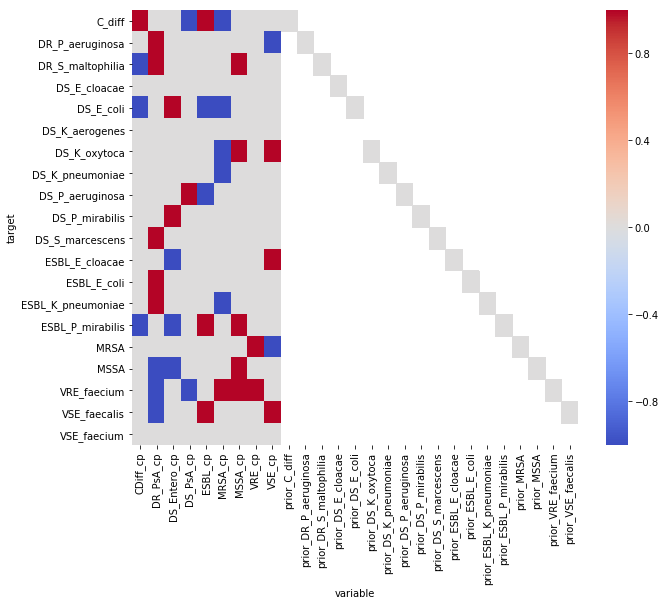

In [142]:
heatmap_df = env_match_logit_df.pivot(index='target',
                         columns='variable', 
                         values='sig_direction')
# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, cmap = 'coolwarm')
plt.show()

/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


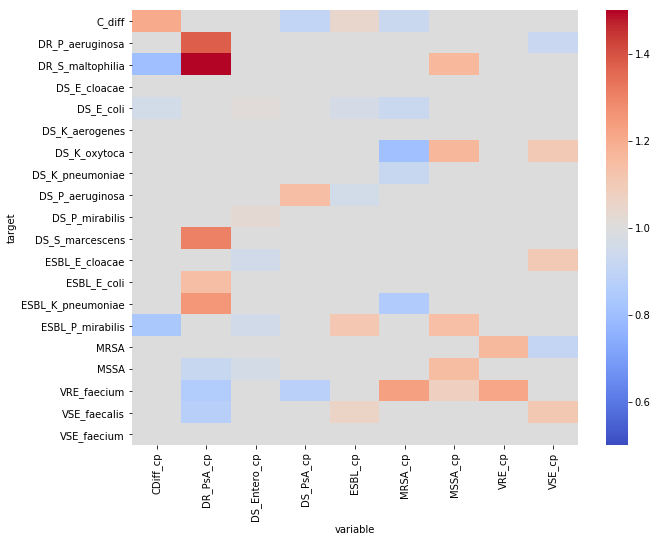

In [149]:
heatmap_df = env_match_logit_df[env_match_logit_df['variable'].isin(['CDiff_cp', 'DR_PsA_cp', 'DS_Entero_cp', 'DS_PsA_cp',
                    'ESBL_cp', 'MRSA_cp', 'MSSA_cp', 'VRE_cp', 'VSE_cp'])]

heatmap_df['sig_continuous'] = heatmap_df['coef']
heatmap_df['sig_continuous'] = np.where(heatmap_df['sig_flag'] == '*',heatmap_df['sig_continuous'],1 )

heatmap_df = heatmap_df.pivot(index='target',
                              columns='variable', 
                              values='sig_continuous')

# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, 
            cmap = 'coolwarm',
            vmin = 0.5, 
            vmax = 1.5, 
            center = 1)
plt.show()

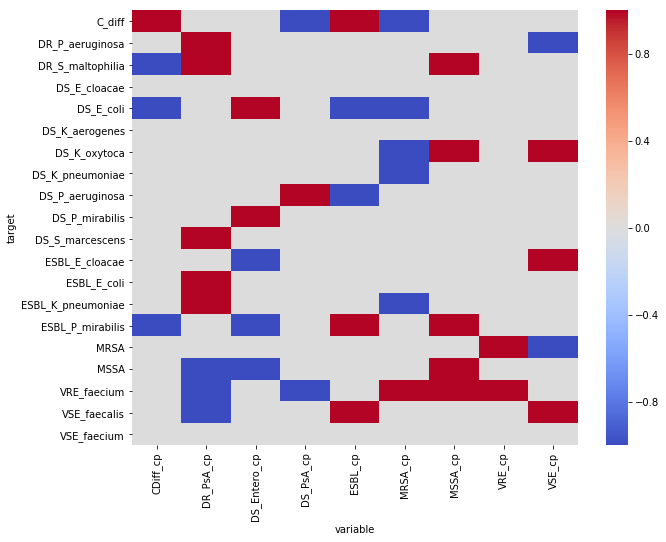

In [150]:
heatmap_df = env_match_logit_df[env_match_logit_df['variable'].isin(['CDiff_cp', 'DR_PsA_cp', 'DS_Entero_cp', 'DS_PsA_cp',
                    'ESBL_cp', 'MRSA_cp', 'MSSA_cp', 'VRE_cp', 'VSE_cp'])]

heatmap_df = heatmap_df.pivot(index='target',
                         columns='variable', 
                         values='sig_direction')
# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, cmap = 'coolwarm')
plt.show()

In [136]:
env_match_logit_df

,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag,sig_direction
0,environmental,C_diff,prior_C_diff,401.475782,0.015172,1.062351e+07,5.195725,2.485569e-01,NaN,0
1,environmental,C_diff,CDiff_cp,1.206755,1.129589,1.289193e+00,0.033716,2.487736e-08,*,1
2,environmental,C_diff,MSSA_cp,0.972761,0.931325,1.016040e+00,0.022210,2.136867e-01,NaN,0
3,environmental,C_diff,MRSA_cp,0.930027,0.867497,9.970657e-01,0.035512,4.108081e-02,*,-1
4,environmental,C_diff,DS_Entero_cp,0.984341,0.968153,1.000799e+00,0.008460,6.210998e-02,NaN,0
...,...,...,...,...,...,...,...,...,...,...
193,environmental,VSE_faecium,ESBL_cp,1.108463,0.991520,1.239198e+00,0.056884,7.025574e-02,NaN,0
194,environmental,VSE_faecium,VSE_cp,1.089589,0.987903,1.201741e+00,0.049986,8.607437e-02,NaN,0
195,environmental,VSE_faecium,VRE_cp,1.113716,0.952773,1.301845e+00,0.079634,1.762304e-01,NaN,0
196,environmental,VSE_faecium,DS_PsA_cp,0.955327,0.818647,1.114826e+00,0.078777,5.618199e-01,NaN,0


In [111]:
# XGBoost Metrics
xgboost_metrics_df = pd.read_csv('/PHShome/zw852/hospital_onset_personal_folder/xgboost_metrics.csv')
env_xgboost_metrics = xgboost_metrics_df[xgboost_metrics_df['Match'] == 'environmental']
patient_xgboost_metrics = xgboost_metrics_df[xgboost_metrics_df['Match'] == 'patient']

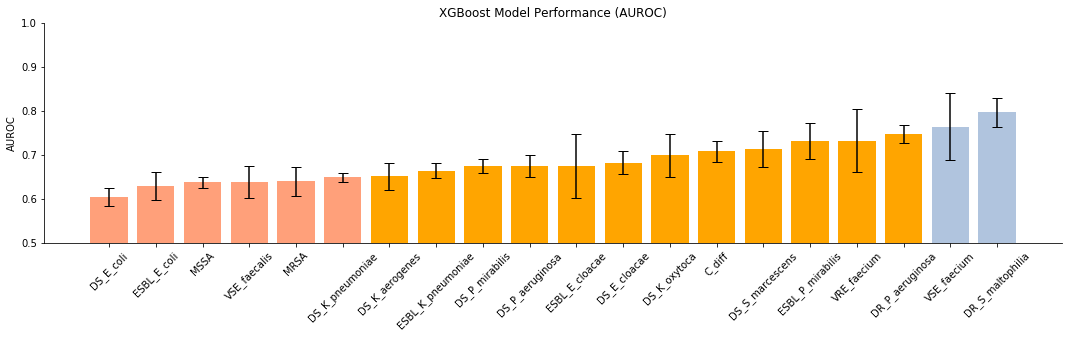

In [112]:
# Environmental XGBoost Metrics
env_xgboost_metrics = env_xgboost_metrics.sort_values(by = ['AUROC'],
                                                      ascending = True)

plt.figure(figsize = (15,4.8))
ax = plt.subplot(111)

plt.bar(x = env_xgboost_metrics[env_xgboost_metrics['AUROC'] <= 0.65]['Target'], 
        height = env_xgboost_metrics[env_xgboost_metrics['AUROC'] <= 0.65]['AUROC'],
        yerr=env_xgboost_metrics[env_xgboost_metrics['AUROC'] <= 0.65]['AUROC_std'],
        capsize = 5,
        color = 'lightsalmon')

plt.bar(x = env_xgboost_metrics[(env_xgboost_metrics['AUROC'] > 0.65) & (env_xgboost_metrics['AUROC'] < 0.75)]['Target'], 
        height = env_xgboost_metrics[(env_xgboost_metrics['AUROC'] > 0.65) & (env_xgboost_metrics['AUROC'] < 0.75)]['AUROC'],
        yerr=env_xgboost_metrics[(env_xgboost_metrics['AUROC'] > 0.65) & (env_xgboost_metrics['AUROC'] < 0.75)]['AUROC_std'],
        capsize = 5,
        color = 'orange')

plt.bar(x = env_xgboost_metrics[env_xgboost_metrics['AUROC'] >= 0.75]['Target'], 
        height = env_xgboost_metrics[env_xgboost_metrics['AUROC'] >= 0.75]['AUROC'],
        yerr=env_xgboost_metrics[env_xgboost_metrics['AUROC'] >= 0.75]['AUROC_std'],
        capsize = 5,
        color = 'lightsteelblue')

plt.ylim(0.5,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('XGBoost Model Performance (AUROC)')
plt.ylabel('AUROC')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('/PHShome/zw852/hospital_onset_personal_folder/environmental_xgboost_model_performance.png')

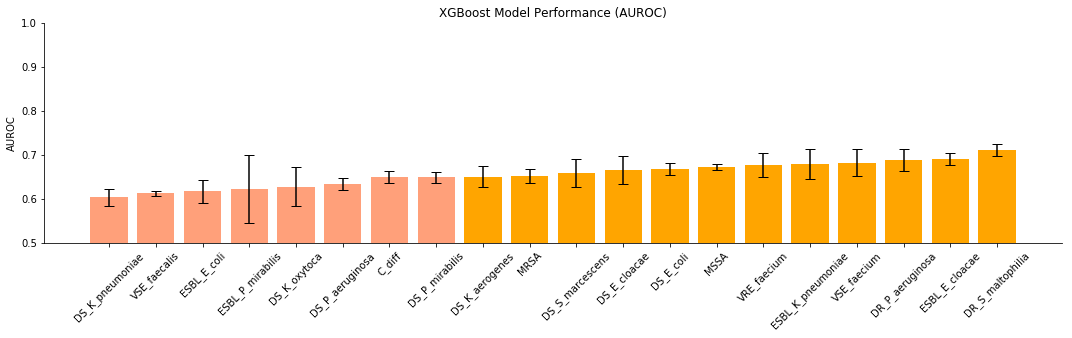

In [113]:
# Patient XGBoost Metrics
patient_xgboost_metrics = patient_xgboost_metrics.sort_values(by = ['AUROC'],
                                                      ascending = True)

plt.figure(figsize = (15,4.8))
ax = plt.subplot(111)

plt.bar(x = patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] <= 0.65]['Target'], 
        height = patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] <= 0.65]['AUROC'],
        yerr=patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] <= 0.65]['AUROC_std'],
        capsize = 5,
        color = 'lightsalmon')

plt.bar(x = patient_xgboost_metrics[(patient_xgboost_metrics['AUROC'] > 0.65) & (patient_xgboost_metrics['AUROC'] < 0.75)]['Target'], 
        height = patient_xgboost_metrics[(patient_xgboost_metrics['AUROC'] > 0.65) & (patient_xgboost_metrics['AUROC'] < 0.75)]['AUROC'],
        yerr=patient_xgboost_metrics[(patient_xgboost_metrics['AUROC'] > 0.65) & (patient_xgboost_metrics['AUROC'] < 0.75)]['AUROC_std'],
        capsize = 5,
        color = 'orange')

plt.bar(x = patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] >= 0.75]['Target'], 
        height = patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] >= 0.75]['AUROC'],
        yerr=patient_xgboost_metrics[patient_xgboost_metrics['AUROC'] >= 0.75]['AUROC_std'],
        capsize = 5,
        color = 'lightsteelblue')

plt.ylim(0.5,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('XGBoost Model Performance (AUROC)')
plt.ylabel('AUROC')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('/PHShome/zw852/hospital_onset_personal_folder/patient_xgboost_model_performance.png')

In [416]:
# CLR Metrics
clr_metrics_df = pd.read_csv('/PHShome/zw852/hospital_onset_personal_folder/patient_rematch_results/clr_model_performance.csv')
env_clr_metrics = clr_metrics_df[clr_metrics_df['Match'] == 'environmental']
patient_clr_metrics = clr_metrics_df[clr_metrics_df['Match'] == 'patient']
print(clr_metrics_df)

               Target          Match     AUROC
0              C_diff  environmental  0.645868
1     DR_P_aeruginosa  environmental  0.684984
2    DR_S_maltophilia  environmental  0.733885
3        DS_E_cloacae  environmental  0.594547
4           DS_E_coli  environmental  0.566834
5      DS_K_aerogenes  environmental  0.627545
6        DS_K_oxytoca  environmental  0.703581
7     DS_K_pneumoniae  environmental  0.546364
8     DS_P_aeruginosa  environmental  0.586737
9      DS_P_mirabilis  environmental  0.597115
10    DS_S_marcescens  environmental  0.641559
11     ESBL_E_cloacae  environmental  0.636536
12        ESBL_E_coli  environmental  0.584540
13  ESBL_K_pneumoniae  environmental  0.650543
14   ESBL_P_mirabilis  environmental  0.694772
15               MRSA  environmental  0.594990
16               MSSA  environmental  0.648218
17        VRE_faecium  environmental  0.691655
18       VSE_faecalis  environmental  0.629856
19        VSE_faecium  environmental  0.735879
20           

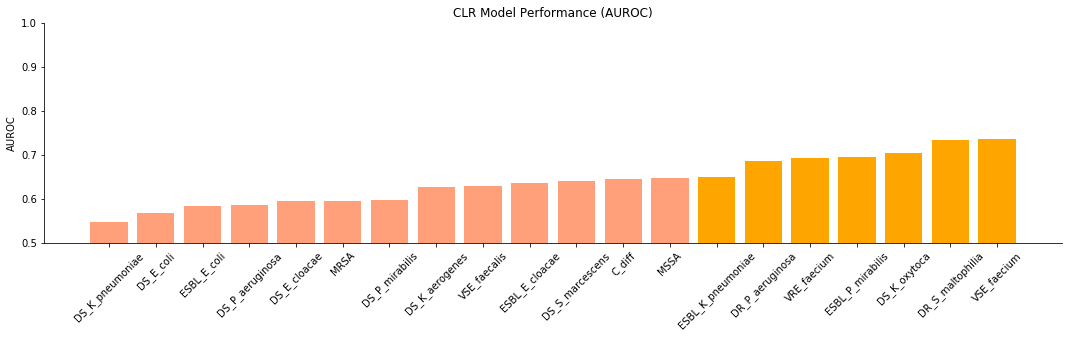

In [417]:
# Environmental CLR Metrics
env_clr_metrics = env_clr_metrics.sort_values(by = ['AUROC'],
                                                      ascending = True)

plt.figure(figsize = (15,4.8))
ax = plt.subplot(111)

plt.bar(x = env_clr_metrics[env_clr_metrics['AUROC'] <= 0.65]['Target'], 
        height = env_clr_metrics[env_clr_metrics['AUROC'] <= 0.65]['AUROC'],
        # yerr=env_clr_metrics[env_clr_metrics['AUROC'] <= 0.65]['AUROC_std'],
        capsize = 5,
        color = 'lightsalmon')

plt.bar(x = env_clr_metrics[(env_clr_metrics['AUROC'] > 0.65) & (env_clr_metrics['AUROC'] < 0.75)]['Target'], 
        height = env_clr_metrics[(env_clr_metrics['AUROC'] > 0.65) & (env_clr_metrics['AUROC'] < 0.75)]['AUROC'],
        # yerr=env_clr_metrics[(env_clr_metrics['AUROC'] > 0.65) & (env_clr_metrics['AUROC'] < 0.75)]['AUROC_std'],
        capsize = 5,
        color = 'orange')

plt.bar(x = env_clr_metrics[env_clr_metrics['AUROC'] >= 0.75]['Target'], 
        height = env_clr_metrics[env_clr_metrics['AUROC'] >= 0.75]['AUROC'],
        # yerr=env_clr_metrics[env_clr_metrics['AUROC'] >= 0.75]['AUROC_std'],
        capsize = 5,
        color = 'lightsteelblue')

plt.ylim(0.5,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('CLR Model Performance (AUROC)')
plt.ylabel('AUROC')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('/PHShome/zw852/hospital_onset_personal_folder/environmental_clr_model_performance.png')

/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


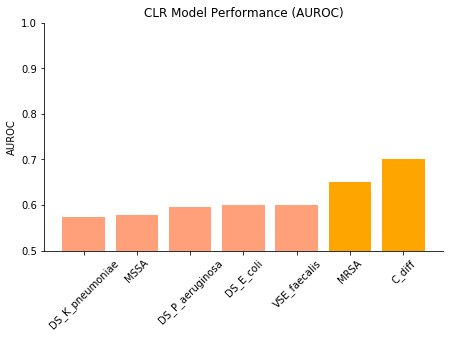

In [462]:
# Patient CLR Metrics
patient_clr_metrics = patient_clr_metrics.sort_values(by = ['AUROC'],
                                                  ascending = True)
patient_clr_metrics = patient_clr_metrics[patient_clr_metrics['Target'].isin(patient_match_interested_logit_df['target'].unique())]
plt.figure(figsize = (6.4,4.8))
ax = plt.subplot(111)

plt.bar(x = patient_clr_metrics[patient_clr_metrics['AUROC'] <= 0.65]['Target'], 
        height = patient_clr_metrics[patient_clr_metrics['AUROC'] <= 0.65]['AUROC'],
        # yerr=env_clr_metrics[env_clr_metrics['AUROC'] <= 0.65]['AUROC_std'],
        capsize = 5,
        color = 'lightsalmon')

plt.bar(x = patient_clr_metrics[(patient_clr_metrics['AUROC'] > 0.65) & (patient_clr_metrics['AUROC'] < 0.75)]['Target'], 
        height = patient_clr_metrics[(env_clr_metrics['AUROC'] > 0.65) & (patient_clr_metrics['AUROC'] < 0.75)]['AUROC'],
        # yerr=env_clr_metrics[(env_clr_metrics['AUROC'] > 0.65) & (env_clr_metrics['AUROC'] < 0.75)]['AUROC_std'],
        capsize = 5,
        color = 'orange')

plt.bar(x = patient_clr_metrics[patient_clr_metrics['AUROC'] >= 0.75]['Target'], 
        height = patient_clr_metrics[patient_clr_metrics['AUROC'] >= 0.75]['AUROC'],
        # yerr=env_clr_metrics[env_clr_metrics['AUROC'] >= 0.75]['AUROC_std'],
        capsize = 5,
        color = 'lightsteelblue')

plt.ylim(0.5,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('CLR Model Performance (AUROC)')
plt.ylabel('AUROC')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('/PHShome/zw852/hospital_onset_personal_folder/model_performance_plots/patient_clr_model_performance.png')